In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline


# EDA

In [49]:
#read data
path = "/Users/huilisi/Desktop/ba501 hw/project/"
name = "Python_project_eda.csv"
data = pd.read_csv(path+name)

In [4]:
data.head(5)

,buyer_week_before,clicked_buy_before,country,existing_buyer,initial_fop_set,made_purchase_before,saw_cart_before,spend_usd_next_14_days,user_added_credit_card,user_added_dcb,user_added_fop,user_added_gift_card,user_added_paypal,user_id,visit_before
0,0,0.0,IN,0,False,0.0,1.0,NaN,NaN,NaN,0,NaN,NaN,18321316048201303366,1
1,0,0.0,IN,0,False,0.0,1.0,NaN,NaN,NaN,0,NaN,NaN,13705367724816913241,1
2,0,NaN,IN,0,False,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,6605724765451655114,0
3,0,1.0,CA,1,True,1.0,1.0,7.398815,1.0,0.0,1,0.0,0.0,2340067911948261502,1
4,7,1.0,PL,1,True,1.0,1.0,NaN,0.0,1.0,1,0.0,0.0,11891045596810635427,1


In [7]:
#binary :clicked_buy_before,existing_buyer,made_purchase_before,saw_cart_before,visit_before

## bool: initial_fop_set

### fop:user_added_credit_card,user_added_dcb,user_added_fop, user_added_gift_card,user_added_paypal
np.unique(data["visit_before"]) 

array([0, 1])

In [8]:
### 是否要做dummy variable？ --- country
data.shape

(566699, 15)

In [9]:
# summary statistics
data.describe()

,buyer_week_before,clicked_buy_before,existing_buyer,made_purchase_before,saw_cart_before,spend_usd_next_14_days,user_added_credit_card,user_added_dcb,user_added_fop,user_added_gift_card,user_added_paypal,user_id,visit_before
count,566699.000000,495640.000000,566699.000000,495640.000000,495640.000000,89032.000000,170597.000000,170597.000000,566699.000000,170597.000000,170597.000000,5.666990e+05,566699.000000
mean,0.621745,0.257782,0.268135,0.211127,0.933662,67.808838,0.548556,0.479581,0.301036,0.184915,0.099937,9.222149e+18,0.874609
std,1.701956,0.437414,0.442989,0.408109,0.248873,214.097885,0.497638,0.499584,0.458709,0.388230,0.299917,5.319984e+18,0.331162
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.002991,0.000000,0.000000,0.000000,0.000000,0.000000,9.099261e+12,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,4.990000,0.000000,0.000000,0.000000,0.000000,0.000000,4.614402e+18,1.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,15.828656,1.000000,0.000000,0.000000,0.000000,0.000000,9.218982e+18,1.000000
75%,0.000000,1.000000,1.000000,0.000000,1.000000,54.795602,1.000000,1.000000,1.000000,0.000000,0.000000,1.382236e+19,1.000000
max,8.000000,1.000000,1.000000,1.000000,1.000000,22519.570000,1.000000,1.000000,1.000000,1.000000,1.000000,1.844674e+19,1.000000


(array([  2.60710000e+04,   1.32760000e+04,   7.62800000e+03,
          5.40300000e+03,   4.35000000e+03,   3.22100000e+03,
          2.44700000e+03,   2.23100000e+03,   1.95400000e+03,
          1.70800000e+03,   1.33300000e+03,   1.17500000e+03,
          9.52000000e+02,   1.02100000e+03,   1.11300000e+03,
          7.88000000e+02,   8.51000000e+02,   6.36000000e+02,
          6.06000000e+02,   5.60000000e+02,   5.54000000e+02,
          4.54000000e+02,   4.57000000e+02,   3.83000000e+02,
          4.02000000e+02,   3.20000000e+02,   3.49000000e+02,
          3.15000000e+02,   2.77000000e+02,   3.65000000e+02,
          3.09000000e+02,   2.37000000e+02,   2.43000000e+02,
          2.11000000e+02,   2.17000000e+02,   2.06000000e+02,
          2.20000000e+02,   1.85000000e+02,   1.75000000e+02,
          1.84000000e+02,   1.72000000e+02,   1.48000000e+02,
          1.39000000e+02,   1.45000000e+02,   2.25000000e+02,
          1.30000000e+02,   1.14000000e+02,   9.80000000e+01,
        

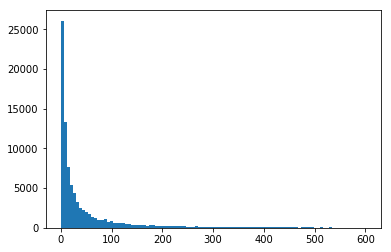

In [50]:
#data["spend_usd_next_14_days"].mean()
#data["spend_usd_next_14_days"].std()  
## why don't use easy functions?

#ax.hist(x,bins=20,normed=True, label="data")

#data["spend_usd_next_14_days"].hist(by=data["spend_usd_next_14_days"])
# our data:
# need to analzye each situation and make assumptions.
# example:

#data["spend_usd_next_14_days"]=data["spend_usd_next_14_days"].dropna(0)

fig =plt.figure()
ax=fig.add_subplot(1,1,1)
x=data["spend_usd_next_14_days"].dropna()
plt.hist(x,bins=100, range=[0,600],label="data")
#data.plot.hist()
## two continues features ---- use distribution and box to plot
## histogram  scale smaller -- [0 - 600]
# marjority populations lie in [0-600]

# Deal with missing values

In [51]:
data.isnull().sum()

buyer_week_before              0
clicked_buy_before         71059
country                    12524
existing_buyer                 0
initial_fop_set                0
made_purchase_before       71059
saw_cart_before            71059
spend_usd_next_14_days    477667
user_added_credit_card    396102
user_added_dcb            396102
user_added_fop                 0
user_added_gift_card      396102
user_added_paypal         396102
user_id                        0
visit_before                   0
dtype: int64

In [37]:
# spend: nan means there's no value in the orders table. so replace with 0 makes sense
data["spend_usd_next_14_days"] = data["spend_usd_next_14_days"].fillna(0)
# country: nan means country is missing. better leave it as nan
data["country"] = data["country"].fillna("unknown")
data.head()

,buyer_week_before,clicked_buy_before,country,existing_buyer,initial_fop_set,made_purchase_before,saw_cart_before,spend_usd_next_14_days,user_added_credit_card,user_added_dcb,user_added_fop,user_added_gift_card,user_added_paypal,user_id,visit_before
0,0,0.0,IN,0,False,0.0,1.0,0.000000,NaN,NaN,0,NaN,NaN,18321316048201303366,1
1,0,0.0,IN,0,False,0.0,1.0,0.000000,NaN,NaN,0,NaN,NaN,13705367724816913241,1
2,0,NaN,IN,0,False,NaN,NaN,0.000000,NaN,NaN,0,NaN,NaN,6605724765451655114,0
3,0,1.0,CA,1,True,1.0,1.0,7.398815,1.0,0.0,1,0.0,0.0,2340067911948261502,1
4,7,1.0,PL,1,True,1.0,1.0,0.000000,0.0,1.0,1,0.0,0.0,11891045596810635427,1


In [44]:

for col in ["clicked_buy_before","made_purchase_before","saw_cart_before","user_added_credit_card","user_added_dcb","user_added_gift_card","user_added_paypal",]:
    data[col] = data[col].fillna(0)

In [46]:
data.head()

,buyer_week_before,clicked_buy_before,country,existing_buyer,initial_fop_set,made_purchase_before,saw_cart_before,spend_usd_next_14_days,user_added_credit_card,user_added_dcb,user_added_fop,user_added_gift_card,user_added_paypal,user_id,visit_before
0,0,0.0,IN,0,False,0.0,1.0,0.000000,0.0,0.0,0,0.0,0.0,18321316048201303366,1
1,0,0.0,IN,0,False,0.0,1.0,0.000000,0.0,0.0,0,0.0,0.0,13705367724816913241,1
2,0,0.0,IN,0,False,0.0,0.0,0.000000,0.0,0.0,0,0.0,0.0,6605724765451655114,0
3,0,1.0,CA,1,True,1.0,1.0,7.398815,1.0,0.0,1,0.0,0.0,2340067911948261502,1
4,7,1.0,PL,1,True,1.0,1.0,0.000000,0.0,1.0,1,0.0,0.0,11891045596810635427,1


#two key features

In [66]:

data["buyer_week_before"].value_counts().to_frame()

,buyer_week_before
0,472269
1,23068
2,15913
3,11700
8,10068
4,9765
5,8391
6,7886
7,7639


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1a6b4550>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1a1c88d208>], dtype=object)

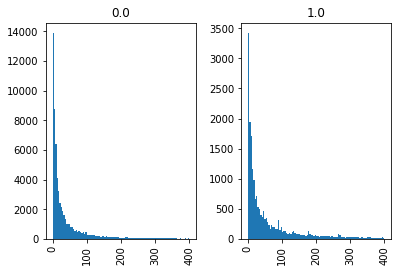

In [67]:
data["spend_usd_next_14_days"].hist(bins=100, range=[0,400],by=data["user_added_gift_card"])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a12fd3630>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1a11d27048>], dtype=object)

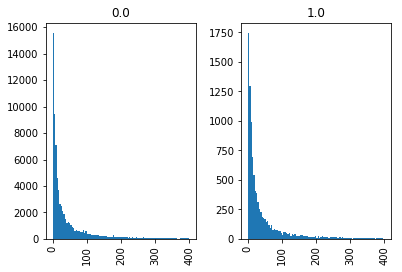

In [16]:
data["spend_usd_next_14_days"].hist(bins=100, range=[0,400],by=data["user_added_paypal"])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a123ab588>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1a12ac6518>], dtype=object)

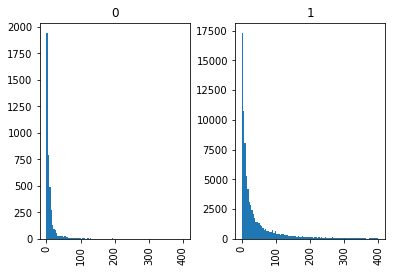

In [17]:
data["spend_usd_next_14_days"].hist(bins=100, range=[0,400],by=data["user_added_fop"])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a134786d8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1a13e09828>], dtype=object)

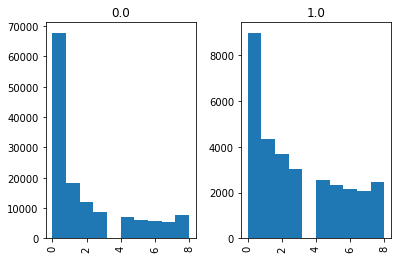

In [18]:
data["buyer_week_before"].hist(by=data["user_added_gift_card"])

In [73]:
data["user_added_gift_card"].value_counts()

0.0    139051
1.0     31546
Name: user_added_gift_card, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a13e76208>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x107af0780>], dtype=object)

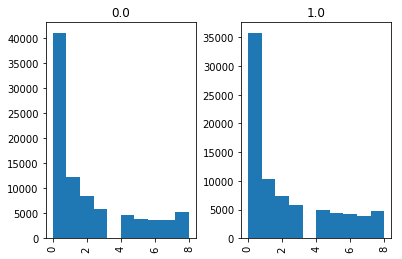

In [19]:
data["buyer_week_before"].hist(by=data["user_added_dcb"])

In [74]:
data.groupby("user_added_gift_card")[["visit_before", "saw_cart_before","clicked_buy_before","made_purchase_before"]].mean()

,visit_before,saw_cart_before,clicked_buy_before,made_purchase_before
user_added_gift_card,,,,
0.0,0.935290,0.974018,0.757491,0.602408
1.0,0.969505,0.990289,0.862673,0.827001


In [82]:
data.groupby("user_added_gift_card")["buyer_week_before"].mean().to_frame()

,buyer_week_before
user_added_gift_card,
0.0,1.882748
1.0,2.838046


In [81]:
data.groupby("user_added_credit_card")["buyer_week_before"].mean().to_frame()

,buyer_week_before
user_added_credit_card,
0.0,1.639810
1.0,2.404704


In [80]:
data.groupby("user_added_paypal")["buyer_week_before"].mean().to_frame()

,buyer_week_before
user_added_paypal,
0.0,1.997024
1.0,2.621151


In [79]:
data.groupby("user_added_dcb")["buyer_week_before"].mean().to_frame()

,buyer_week_before
user_added_dcb,
0.0,1.967865
1.0,2.158724


array([<matplotlib.axes._subplots.AxesSubplot object at 0x107afbeb8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1a1365cb70>], dtype=object)

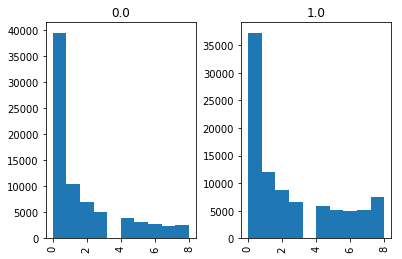

In [20]:
data["buyer_week_before"].hist(by=data["user_added_credit_card"])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a13e281d0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1a13ed7080>], dtype=object)

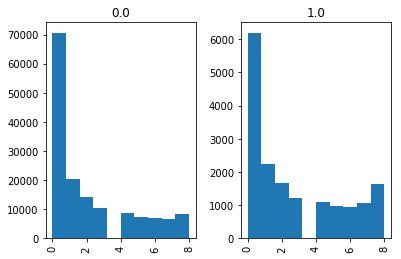

In [21]:
data["buyer_week_before"].hist(by=data["user_added_paypal"])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a11bf7b00>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a12547518>]], dtype=object)

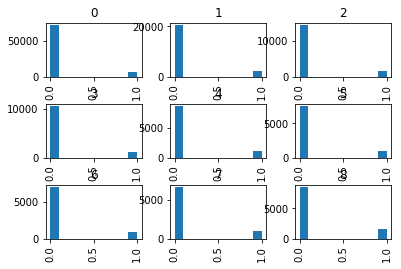

In [55]:
data["user_added_paypal"].hist(by=data["buyer_week_before"])

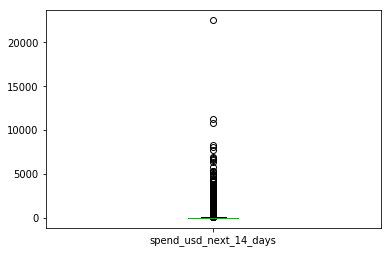

In [58]:
data["spend_usd_next_14_days"].plot.box()

In [8]:
# mean:center metric    
## why use this method? 
#def mean(x):
#    return float(sum(x))/len(x)

np.mean(data.spend_usd_next_14_days)

67.80883817484795

In [9]:
# variance: how data spreads out
#def stddev(x):
#    m=mean(x)
#    return math.pow(sum((i-m)**2) for i in x)/len(x)

np.std(data.spend_usd_next_14_days)


214.09668268368236

In [10]:
# quantiles
# median
# question:when to use mean,when to use median?
def median(x):
    s= sorted(x)
    n=len(x)
    lower_mid =int(math.floor((n-1)/2.))
    upper_mid = int(math.ceil((n-1)/2.))
    return (s[lower_mid],s[upper_mid])

np.nanmedian(data.spend_usd_next_14_days)

np.nanpercentile(data.spend_usd_next_14_days,[0,25,50,75,99,100])

array([  2.99100000e-03,   4.99000000e+00,   1.58286560e+01,
         5.47956018e+01,   7.75693500e+02,   2.25195700e+04])

In [17]:
#for convinience, remove nan value
spend_usd_next_14_days =data.spend_usd_next_14_days
spend_usd_next_14_days = spend_usd_next_14_days.dropna()
spend_usd_next_14_days



data.head()

,buyer_week_before,clicked_buy_before,country,existing_buyer,initial_fop_set,made_purchase_before,saw_cart_before,spend_usd_next_14_days,user_added_credit_card,user_added_dcb,user_added_fop,user_added_gift_card,user_added_paypal,user_id,visit_before
0,0,0.0,IN,0,False,0.0,1.0,0.000000,NaN,NaN,0,NaN,NaN,18321316048201303366,1
1,0,0.0,IN,0,False,0.0,1.0,0.000000,NaN,NaN,0,NaN,NaN,13705367724816913241,1
2,0,NaN,IN,0,False,NaN,NaN,0.000000,NaN,NaN,0,NaN,NaN,6605724765451655114,0
3,0,1.0,CA,1,True,1.0,1.0,7.398815,1.0,0.0,1,0.0,0.0,2340067911948261502,1
4,7,1.0,PL,1,True,1.0,1.0,0.000000,0.0,1.0,1,0.0,0.0,11891045596810635427,1


In [44]:
data.head()

,buyer_week_before,clicked_buy_before,country,existing_buyer,initial_fop_set,made_purchase_before,saw_cart_before,spend_usd_next_14_days,user_added_credit_card,user_added_dcb,user_added_fop,user_added_gift_card,user_added_paypal,user_id,visit_before
0,0,0.0,IN,0,False,0.0,1.0,NaN,NaN,NaN,0,NaN,NaN,18321316048201303366,1
1,0,0.0,IN,0,False,0.0,1.0,NaN,NaN,NaN,0,NaN,NaN,13705367724816913241,1
2,0,NaN,IN,0,False,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,6605724765451655114,0
3,0,1.0,CA,1,True,1.0,1.0,7.398815,1.0,0.0,1,0.0,0.0,2340067911948261502,1
4,7,1.0,PL,1,True,1.0,1.0,NaN,0.0,1.0,1,0.0,0.0,11891045596810635427,1


In [12]:
data.describe()

,buyer_week_before,clicked_buy_before,existing_buyer,made_purchase_before,saw_cart_before,spend_usd_next_14_days,user_added_credit_card,user_added_dcb,user_added_fop,user_added_gift_card,user_added_paypal,user_id,visit_before
count,566699.000000,495640.000000,566699.000000,495640.000000,495640.000000,89032.000000,170597.000000,170597.000000,566699.000000,170597.000000,170597.000000,5.666990e+05,566699.000000
mean,0.621745,0.257782,0.268135,0.211127,0.933662,67.808838,0.548556,0.479581,0.301036,0.184915,0.099937,9.222149e+18,0.874609
std,1.701956,0.437414,0.442989,0.408109,0.248873,214.097885,0.497638,0.499584,0.458709,0.388230,0.299917,5.319984e+18,0.331162
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.002991,0.000000,0.000000,0.000000,0.000000,0.000000,9.099261e+12,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,4.990000,0.000000,0.000000,0.000000,0.000000,0.000000,4.614402e+18,1.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,15.828656,1.000000,0.000000,0.000000,0.000000,0.000000,9.218982e+18,1.000000
75%,0.000000,1.000000,1.000000,0.000000,1.000000,54.795602,1.000000,1.000000,1.000000,0.000000,0.000000,1.382236e+19,1.000000
max,8.000000,1.000000,1.000000,1.000000,1.000000,22519.570000,1.000000,1.000000,1.000000,1.000000,1.000000,1.844674e+19,1.000000


In [12]:
#skeness
stats.skew(spend_usd_next_14_days)

25.481428896161574

(array([  8.,  24.,  26.,  22.,  11.,   5.,   2.,   1.,   0.,   1.]),
 array([  41.2951946 ,   50.56640924,   59.83762389,   69.10883854,
          78.38005319,   87.65126783,   96.92248248,  106.19369713,
         115.46491178,  124.73612643,  134.00734107]),
 <a list of 10 Patch objects>)

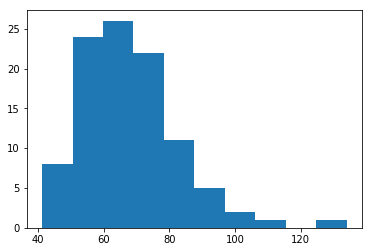

In [18]:
#CLT: our data ---> normal   
# check whether normal
fig,ax=plt.subplots(1,1)

def get_sample(data,n):
    return np.random.choice(data,n,replace=False)

def sample_mean(x):
    return np.mean(x)/n

samples =[]

N=200
for i in range(100):
    this_sample =get_sample(spend_usd_next_14_days,N)
    samples.append(np.mean(this_sample))
    
plt.hist(samples)

In [30]:

#av=np.mean(spend_usd_next_14_days)
#stdev =np.std(spend_usd_next_14_days)
#plt.plot(spend_usd_next_14_days,stats.norm.pdf(spend_usd_next_14_days,av,stdev),"r-",lw=3,alpha=0.9,label="norm pdf")

mean =np.mean(spend_usd_next_14_days)
sigma=np.std(spend_usd_next_14_days)
x=spend_usd_next_14_days
x -= mean

x_plot = np.linspace(min(x),max(x),1000)

fig =plt.figure()
ax=fig.add_subplot(1,1,1)

ax.hist(x,bins=20,normed=True, label="data")
ax.plot(x_plot,stats.norm.pdf(x_plot,mean,sigma),"r-")

ax.legend(loc="best")

#x_ticks=np.arange(-4*sigma,4.1*sigma,sigma)
#x_labels =[r"${} \sigma$.format(i) for i in range(-4,5)"]

ax.set_xticks(x_ticks)
ax.set_xticklabels(x_labels)

plt.show()

In [15]:
contry_agg =data.sort_values(["spend_usd_next_14_days"]).groupby(["country"]).agg(["count"])

In [84]:
contry_agg

NameError: name 'contry_agg' is not defined

# A/B TEST

In [86]:
path = "/Users/huilisi/Desktop/ba501 hw/project/"
name = "Python_project_experiment.csv"
data_t = pd.read_csv(path+name)

In [88]:
data_t["experiment_id"].value_counts()

12624548    24695
12624549    24471
Name: experiment_id, dtype: int64

In [114]:
control =data_t[data_t.experiment_id==12624548]["spend_usd"]
treatment=data_t[data_t.experiment_id==12624549]["spend_usd"]


In [115]:
stats.ttest_ind(control,treatment,equal_var=False)

Ttest_indResult(statistic=2.8808880810552759, pvalue=0.0039672827581814325)